# Uczenie Maszynowe - ćwiczenia 4.5

Zadaniad dodatkowe obejmujące zagadnienia przydatne w pracy z sygnałami - seriami czasowymi

Wykorzystamy do tego specjalną, dedykowaną bibliotekę będącą rozszerzeniem scikit-learn - sktime. Jeśli jej nie masz - należy ją najpierw zainstalować w środowisku Pythona

`pip install sktime`


In [1]:
import sktime

Załadujmy dane które są serią czasową:

In [2]:
import numpy as np
import pandas as pd
from sktime.datasets import load_airline

C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\__init__.py:16: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.5)
  from scipy.sparse import issparse


In [3]:
# Liczba pasażerów samolotów
y = load_airline()
y.index = np.arange(len(y))

Dane początkowo rozbijamy na zbiór testowy i treningowy - jak zawsze. Tym razem te metody dla serii czasowej są jednak nieco inne. Spójrzmy w dokumentację: https://www.sktime.net/en/v0.20.1/api_reference/forecasting.html#time-series-splitters

Jest kilka "spliterów", najprostsza funkcja to zwykły, "twardy" split na dwa zbiory - uszeregowane czasowo. Inen metody obejmują metody "okna", które efektywnie zwiększają liczbę zbiorów uczących i testowych.

In [4]:
# Rozbijmy na test i train
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(y, test_size=36)

Zwizualizujmy problem:

In [5]:
import matplotlib.pyplot as plt

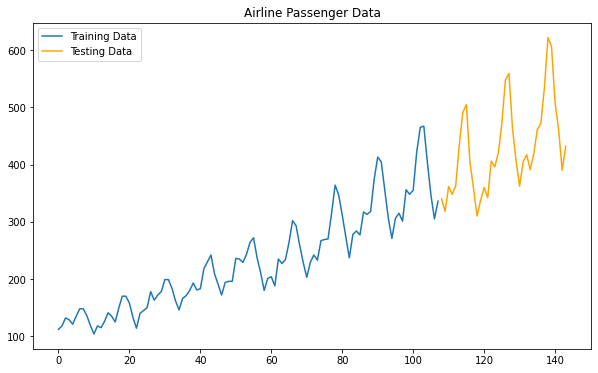

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(y_train, label="Training Data")
plt.plot(y_test, label="Testing Data", color="orange")
plt.legend()
plt.title("Airline Passenger Data")
plt.show()

Zbiór danych Airline Passenger Data przedstawia miesięczną liczbę pasażerów linii lotniczych w latach 1949–1960. Dane te są uporządkowane chronologicznie, co pozwala na analizę zmian w czasie i identyfikację kluczowych komponentów szeregów czasowych, takich jak trend, sezonowość oraz reszty (rezydua).

Zbiór obejmuje 12 lat, zbierane co miesiąc.

W tym zbiorze widać wyraźnie 3 komponenty - trend, sezonowość i rezydua. Postaraj się je zidentyfikować.

Zaaplikujmy najpierw bardo prosty regresor serii czasowej:

In [7]:
from sktime.forecasting.naive import NaiveForecaster
# Przewiduje ostatnią wartość jako kolejną
forecaster = NaiveForecaster(strategy="last")

Trening:

In [8]:
forecaster.fit(y_train)

NaiveForecaster()

Predykcja - dokonajmy predykcji o N kroków w czasie, tyle ile zostało nam w zbiorze testowym:

In [9]:
horizon = np.arange(1,len(y_test)+1)
y_pred = forecaster.predict(horizon)

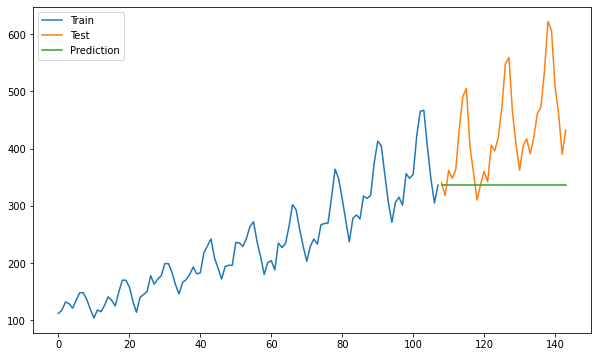

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Test')
plt.plot(y_pred,label='Prediction')
plt.legend()

Widać, metoda dość naiwna. Oceńmy jeszcze nasz model za pomocą miary regresji (są miary dokładnie te same co w standardowej regresji, ale również pojawia się ich nieco więcej: https://www.sktime.net/en/stable/api_reference/performance_metrics.html)

In [11]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")

Mean Absolute Percentage Error (MAPE): 0.20


Spróbujmy uwzględnić jeden z komponentów - sezonowość w naszym modelu:

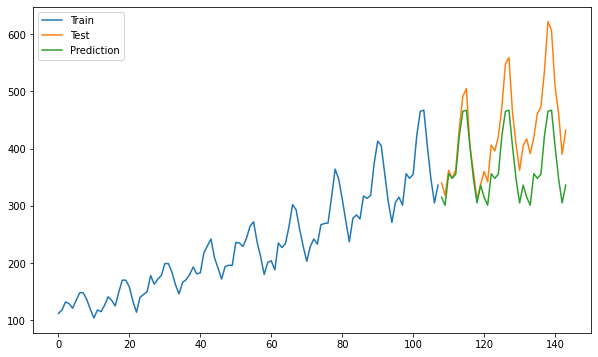

In [12]:
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)
horizon = np.arange(1,len(y_test)+1)
y_pred = forecaster.predict(horizon)
plt.figure(figsize=(10, 6))
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Test')
plt.plot(y_pred,label='Prediction')
plt.legend()

In [13]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")

Mean Absolute Percentage Error (MAPE): 0.13


Sezonowość znacznie podnosi jakość naszego modelu. Przeanalizujmy zatem nasze dane dokładniej.

### Zadanie 1.

Dokonaj dekompozycji serii czasowej i przeanalizuj jej składowe. Wykorzystaj STLTransformer do tej czynności: https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.transformations.series.detrend.STLTransformer.html#sktime.transformations.series.detrend.STLTransformer

Przedstaw wyniki na osobnych wykresach. Jak można wykorzystać tę wiedzę w predykcji?

### Zadanie 2.

Wykorzystaj zdekomponowane komponenty i NaiveForecaster by łącznie poprawić predykcję serii czasowej. Czy uda Ci się poprawić wynik?

### Zadanie 3.

Zapoznaj się z modelem ARIMA: https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.forecasting.arima.ARIMA.html

Model ten składa się z komponentów AR oraz MA, oraz komponentu integracyjnego I. Wykorzystaj model ARIMA by dokonać predykcji zbioru danych. Spróbuj wykorzystać różne kombinacje parametrów `order`, pozostawiając 0, by użyć jedynie komponentu AR, MA oraz I. Postaraj się wyciągnąć wnioski na temat tego jak funkcjonuje ten model.